In [1]:
import pandas as pd
from conceptualDesign.conceptualDesign import conceptualDesign
from misc.openData import openData
from misc.materials import load_materials
import matplotlib.pyplot as plt

In [2]:
material_data: dict = load_materials()
iters = 100

parameters = openData("design1")
params, df = conceptualDesign(parameters, material_data, iters)

In [3]:
df["liftRatio"] = df["balloonLift"] / (df["totalMass"] * 9.81)
df["balloonLength"] = df["balloonVolume"] / df["balloonArea"]
df[["fuelMass", "balloonVolume", "requiredEnergy", "totalMass", "balloonLift", "liftRatio", "balloonLength", "balloonArea"]]

,fuelMass,balloonVolume,requiredEnergy,totalMass,balloonLift,liftRatio,balloonLength,balloonArea
0,21621.723771,0.000000,2.615364e+12,1.363116e+05,0.000000e+00,0.000000,NaN,0.000000
1,23827.968487,232585.437902,2.882231e+12,3.274359e+05,1.336338e+06,0.416026,1672.287499,139.082208
2,36895.931122,256318.068976,4.462932e+12,4.020201e+05,1.472695e+06,0.373419,1727.334752,148.389343
3,39543.616483,396890.478651,4.783196e+12,5.270926e+05,2.280365e+06,0.441010,1998.359702,198.608128
4,47771.202316,425371.698081,5.778405e+12,5.948749e+05,2.444006e+06,0.418801,2045.061158,207.999500
...,...,...,...,...,...,...,...,...
95,89543.599600,963216.020868,1.083119e+13,1.299425e+06,5.534232e+06,0.434147,2685.496984,358.673283
96,89544.173064,963222.800588,1.083126e+13,1.299434e+06,5.534271e+06,0.434147,2685.503285,358.674966
97,89544.694850,963228.969356,1.083133e+13,1.299443e+06,5.534306e+06,0.434147,2685.509018,358.676498
98,89545.169617,963234.582229,1.083138e+13,1.299451e+06,5.534339e+06,0.434147,2685.514234,358.677891


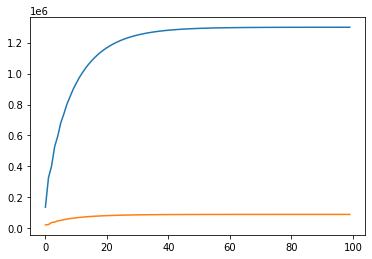

In [4]:
plt.plot(df.index, df.totalMass, df.fuelMass)